# Problem Statement

3.	A sample of global companies and their ratings are given for the cocoa bean production along with the location of the beans being used. Identify the important features in the analysis and accurately classify the companies based on their ratings and draw insights from the data. Build ensemble models such as Bagging, Boosting, Stacking, and Voting on the dataset given.

----- ## ------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_excel('Coca_Rating_Ensemble.xlsx')
data.shape

(1795, 9)

We have 1795 rows and 9 columns

Lets explore our dataset

In [3]:
data.columns

Index(['Company', 'Name', 'REF', 'Review', 'Cocoa_Percent', 'Company_Location',
       'Rating', 'Bean_Type', 'Origin'],
      dtype='object')

In [4]:
data.dtypes

Company              object
Name                 object
REF                 float64
Review              float64
Cocoa_Percent       float64
Company_Location     object
Rating              float64
Bean_Type            object
Origin               object
dtype: object

<AxesSubplot:>

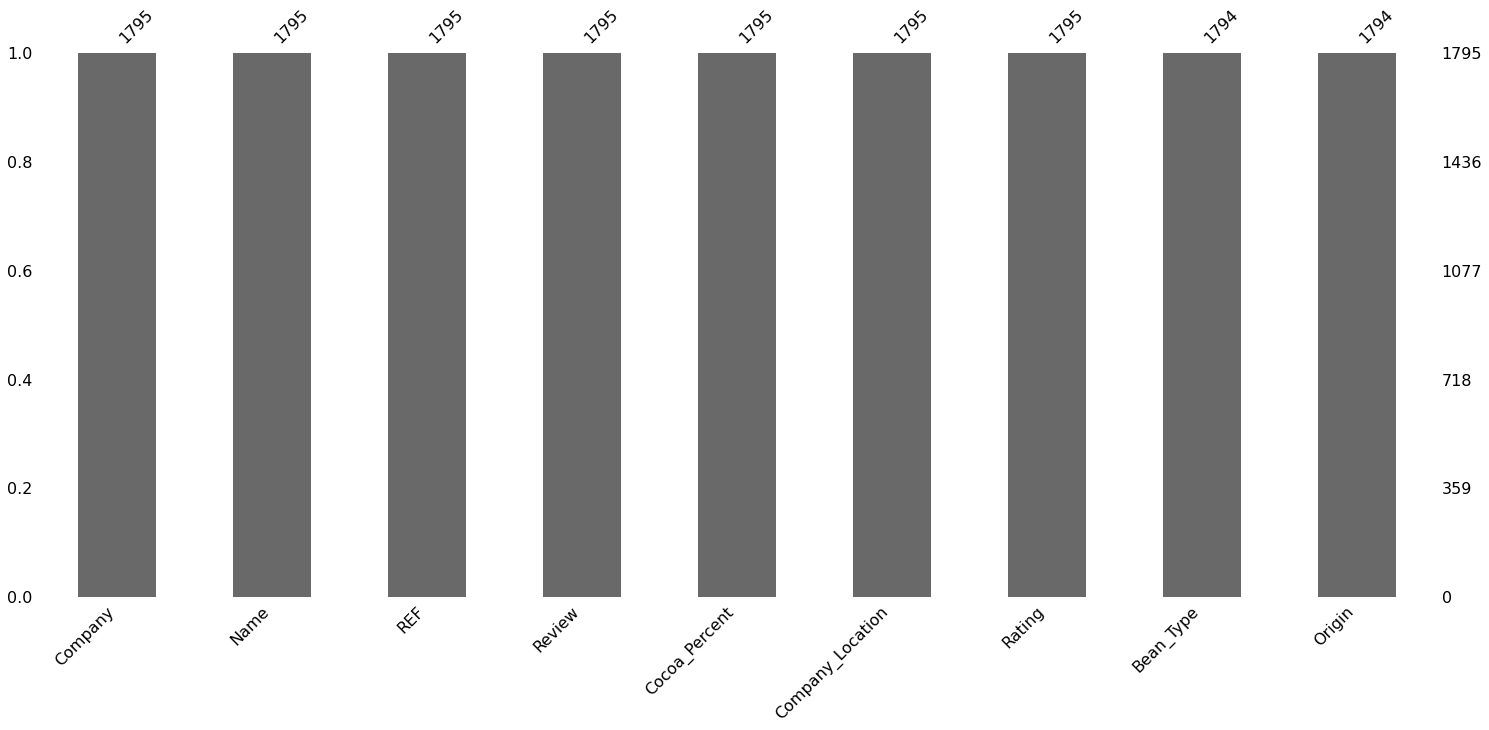

In [5]:
msno.bar(data)

In [6]:
data.describe()

,REF,Review,Cocoa_Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [7]:
data.columns

Index(['Company', 'Name', 'REF', 'Review', 'Cocoa_Percent', 'Company_Location',
       'Rating', 'Bean_Type', 'Origin'],
      dtype='object')

<AxesSubplot:>

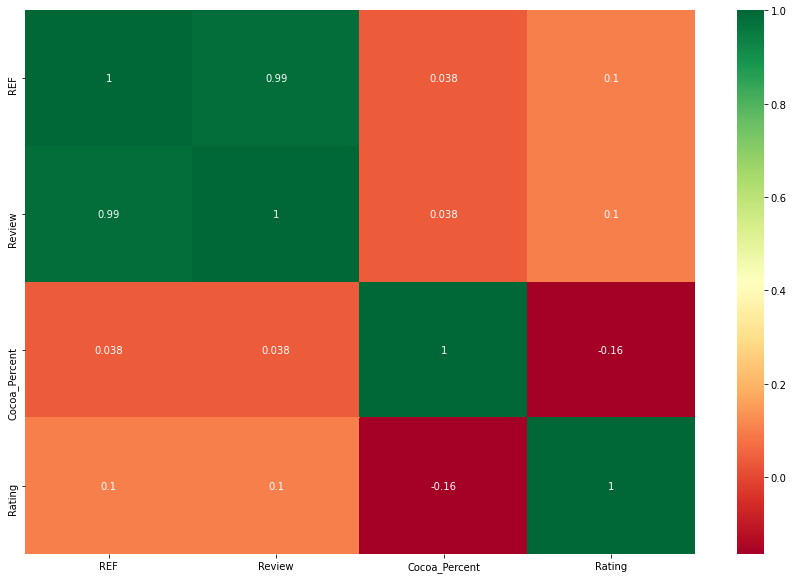

In [8]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data[['REF', 'Review', 'Cocoa_Percent','Rating']].corr(), annot=True,cmap='RdYlGn')

In [9]:
data.head()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680.0,2015.0,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704.0,2015.0,0.70,France,3.50,,Peru


C:\Users\jaich\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


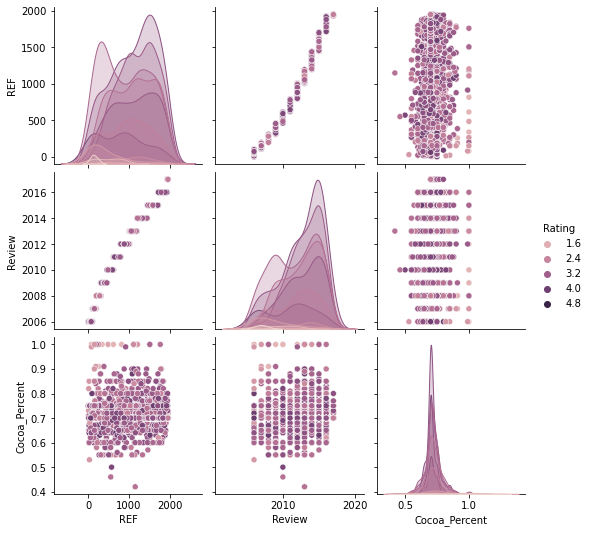

In [10]:
sns.pairplot(data, hue='Rating')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

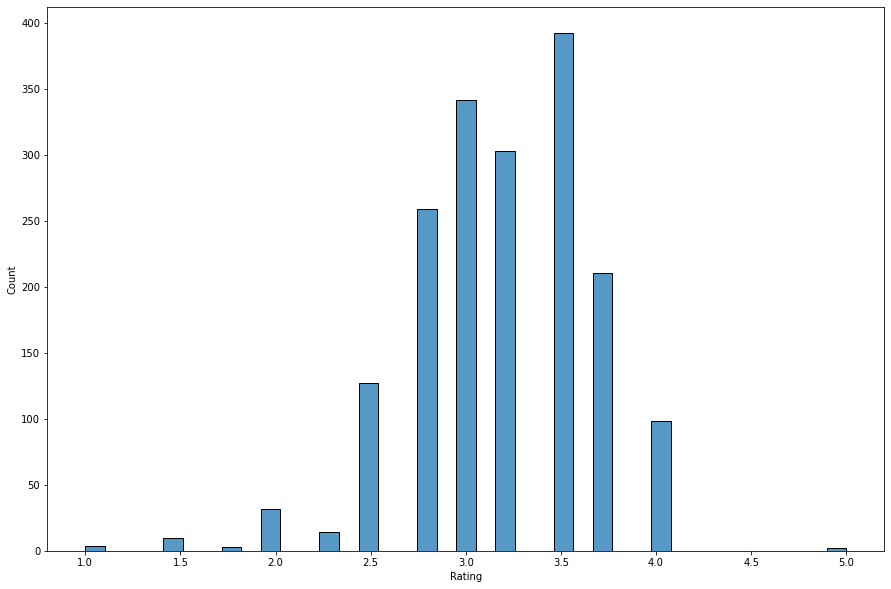

In [11]:
sns.histplot(data['Rating'])

In [12]:
data['Rating'].value_counts()

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

Since we have lot of object data values, we will transform our dataset

For Rating column we will change it to <2.5 to 0 and >= 1

Rest all columns will be with dummy variable

In [16]:
data.columns

Index(['Company', 'Name', 'REF', 'Review', 'Cocoa_Percent', 'Company_Location',
       'Rating', 'Bean_Type', 'Origin'],
      dtype='object')

In [25]:
data['Rating_Bin'] = np.where(data['Rating'] < 2.5,0,1)
data.head()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin,Rating_Bin
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome,1
1,A. Morin,Kpime,1676.0,2015.0,0.70,France,2.75,,Togo,1
2,A. Morin,Atsane,1676.0,2015.0,0.70,France,3.00,,Togo,1
3,A. Morin,Akata,1680.0,2015.0,0.70,France,3.50,,Togo,1
4,A. Morin,Quilla,1704.0,2015.0,0.70,France,3.50,,Peru,1


We will use One hot Encoder to create dummy variables. We will also drop Rating column from our dataset

In [26]:
data['Rating_Bin'].value_counts()

1    1732
0      63
Name: Rating_Bin, dtype: int64

In [27]:
data = data.drop('Rating', axis=1)
data.shape

(1795, 9)

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoderEncoder()

In [29]:
data['Company'] = lb.fit_transform(data['Company'])
data['REF'] = lb.fit_transform(data['REF'])
data['Review'] = lb.fit_transform(data['Review'])
data['Company_Location'] = lb.fit_transform(data['Company_Location'])
data['Bean_Type'] = lb.fit_transform(data['Bean_Type'])
data['Origin'] = lb.fit_transform(data['Origin'])

In [30]:
data = data.drop('Name', axis=1)
data.shape

(1795, 8)

In [31]:
data.head()

,Company,REF,Review,Cocoa_Percent,Company_Location,Bean_Type,Origin,Rating_Bin
0,0,420,10,0.63,18,40,67,1
1,0,370,9,0.70,18,40,77,1
2,0,370,9,0.70,18,40,77,1
3,0,371,9,0.70,18,40,77,1
4,0,377,9,0.70,18,40,55,1


In [32]:
predictors = data.loc[:, data.columns!='Rating_Bin']
target = data['Rating_Bin']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size=0.3, random_state=123)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1256, 7) (539, 7) (1256,) (539,)


In [33]:
import xgboost as xgb

In [34]:
xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 5000, learning_rate = 0.2, n_jobs = -1)

In [35]:
xgb_clf.fit(x_train, y_train)


C:\Users\jaich\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6, max_depths=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [37]:
# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))

array([[  3,  21],
       [  4, 511]], dtype=int64)

In [38]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.9536178107606679

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

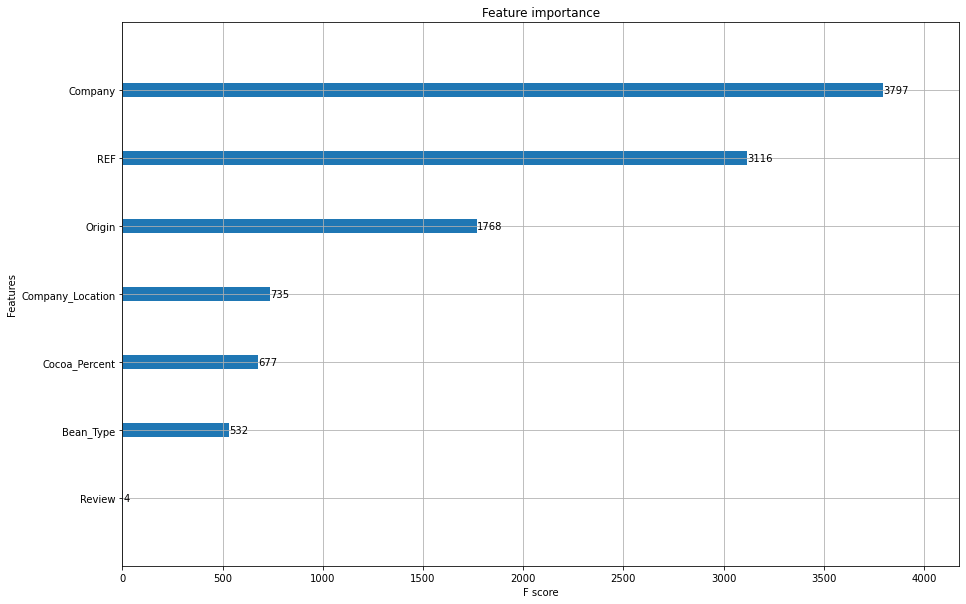

In [39]:
xgb.plot_importance(xgb_clf)
